### Streaming in langgraph

Methods : Stream() and aStream()
* These methods are sync and async methods for streaming back results
Additional paramters in streaming modes for graph state
* values: Thsi streams the full state of the graph after each node is called
* updates: This streams update to the state of the graph after each node is called

In [25]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START,END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages


In [26]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [27]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")


In [28]:
from langchain_groq import ChatGroq
llm_groq=ChatGroq(model="llama-3.3-70b-versatile")
llm_groq.invoke("hi I am sachchida. I am AI enthusiast")

AIMessage(content="Hello Sachchida, nice to meet you. It's great to hear that you're an AI enthusiast. Artificial Intelligence is a fascinating field with endless possibilities and applications. What aspects of AI interest you the most? Are you into machine learning, natural language processing, computer vision, or something else?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 46, 'total_tokens': 107, 'completion_time': 0.148388336, 'prompt_time': 0.004515075, 'queue_time': 0.056603404, 'total_time': 0.152903411}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_34d416ee39', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--90066bd4-49ba-4cac-bfa7-22ea8aef77cb-0', usage_metadata={'input_tokens': 46, 'output_tokens': 61, 'total_tokens': 107})

In [29]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
def superbot(state:State):
    return {'messages':[llm_groq.invoke(state['messages'])]}


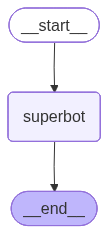

In [30]:
graph=StateGraph(State)
graph.add_node("superbot",superbot)
graph.add_edge(START,"superbot")
graph.add_edge("superbot",END)
graph_builder=graph.compile(checkpointer=memory)
## intialize graph with memory
from IPython.display import Image,display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [31]:
config={"configurable":{"thread_id":"30"}}

In [32]:
graph_builder.invoke({"messages":"Hi I am sachchida I love watching cricket"},config)

{'messages': [HumanMessage(content='Hi I am sachchida I love watching cricket', additional_kwargs={}, response_metadata={}, id='1f06787e-524e-4cd6-88f6-3f51a50b3783'),
  AIMessage(content='Hi Sachchida, nice to meet you. Cricket is an exciting sport, and there are so many thrilling matches and tournaments throughout the year. Which team or player is your favorite? Do you have a preferred format, such as Test cricket, ODIs, or T20s?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 58, 'prompt_tokens': 45, 'total_tokens': 103, 'completion_time': 0.190693762, 'prompt_time': 0.002089762, 'queue_time': 0.056017573, 'total_time': 0.192783524}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_155ab82e98', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--8b054ecc-87c4-496d-98b4-22df57411409-0', usage_metadata={'input_tokens': 45, 'output_tokens': 58, 'total_tokens': 103})]}

In [33]:
config={"configurable":{"thread_id":"1"}}

In [34]:
for chunk in graph_builder.stream({"messages":"Hi my name is sachchida and I play cricket"},config,stream_mode="updates"):
    print(chunk)

{'superbot': {'messages': [AIMessage(content="Hello Sachchida, nice to meet you! Cricket is an exciting sport, isn't it? What position do you play in your team? Are you a batsman, bowler, or an all-rounder?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 46, 'total_tokens': 92, 'completion_time': 0.112913077, 'prompt_time': 0.002259138, 'queue_time': 0.057722598, 'total_time': 0.115172215}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_34d416ee39', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--7df308af-df32-4597-ab2e-5b55649db65e-0', usage_metadata={'input_tokens': 46, 'output_tokens': 46, 'total_tokens': 92})]}}


In [35]:
for chunk in graph_builder.stream({"messages":"Hi my name is sachchida and I play cricket"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi my name is sachchida and I play cricket', additional_kwargs={}, response_metadata={}, id='06f02b33-fcf9-432c-84aa-5fe6eac98217'), AIMessage(content="Hello Sachchida, nice to meet you! Cricket is an exciting sport, isn't it? What position do you play in your team? Are you a batsman, bowler, or an all-rounder?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 46, 'total_tokens': 92, 'completion_time': 0.112913077, 'prompt_time': 0.002259138, 'queue_time': 0.057722598, 'total_time': 0.115172215}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_34d416ee39', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--7df308af-df32-4597-ab2e-5b55649db65e-0', usage_metadata={'input_tokens': 46, 'output_tokens': 46, 'total_tokens': 92}), HumanMessage(content='Hi my name is sachchida and I play cricket', additional_kwargs={}, response_metadata={}, id='efc9e2d0-75f8-

In [36]:
for chunk in graph_builder.stream({"messages":"I like playing cricket not bowling but just batting. I am also a good programmer"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi my name is sachchida and I play cricket', additional_kwargs={}, response_metadata={}, id='06f02b33-fcf9-432c-84aa-5fe6eac98217'), AIMessage(content="Hello Sachchida, nice to meet you! Cricket is an exciting sport, isn't it? What position do you play in your team? Are you a batsman, bowler, or an all-rounder?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 46, 'total_tokens': 92, 'completion_time': 0.112913077, 'prompt_time': 0.002259138, 'queue_time': 0.057722598, 'total_time': 0.115172215}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_34d416ee39', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--7df308af-df32-4597-ab2e-5b55649db65e-0', usage_metadata={'input_tokens': 46, 'output_tokens': 46, 'total_tokens': 92}), HumanMessage(content='Hi my name is sachchida and I play cricket', additional_kwargs={}, response_metadata={}, id='efc9e2d0-75f8-

In [37]:
for chunk in graph_builder.stream({"messages":"I am masters in AI"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi my name is sachchida and I play cricket', additional_kwargs={}, response_metadata={}, id='06f02b33-fcf9-432c-84aa-5fe6eac98217'), AIMessage(content="Hello Sachchida, nice to meet you! Cricket is an exciting sport, isn't it? What position do you play in your team? Are you a batsman, bowler, or an all-rounder?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 46, 'total_tokens': 92, 'completion_time': 0.112913077, 'prompt_time': 0.002259138, 'queue_time': 0.057722598, 'total_time': 0.115172215}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_34d416ee39', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--7df308af-df32-4597-ab2e-5b55649db65e-0', usage_metadata={'input_tokens': 46, 'output_tokens': 46, 'total_tokens': 92}), HumanMessage(content='Hi my name is sachchida and I play cricket', additional_kwargs={}, response_metadata={}, id='efc9e2d0-75f8-

Streaming the responses with astream method
In a particular chat with chat chat model it is scommon to stream the token as they are generated.

We can do this using the .astream_events method, which streams back events as they happen inside nodes

Each event is a dict with a few keys
* event: this is tyep of the event that is being emitted
* name: This is the name of the event
* data: ths is the data associated with tthe event
* metadata: Contains langraph_node, the node emitting the event

In [38]:
config={"configurable": {"thread_id": "4"}}

async for event in graph_builder.astream_events({"messages":["Hi My name is Sachchida, and I like to code"]},config=config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is Sachchida, and I like to code']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '48036736-07d7-4f6b-9dcb-09b1d4e8754a', 'metadata': {'thread_id': '4'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi My name is Sachchida, and I like to code', additional_kwargs={}, response_metadata={}, id='237d8c73-58f7-4a5e-8269-a57d04f99900')]}}, 'name': 'superbot', 'tags': ['graph:step:1'], 'run_id': '34fe785c-e818-4534-8906-19b2407d839a', 'metadata': {'thread_id': '4', 'langgraph_step': 1, 'langgraph_node': 'superbot', 'langgraph_triggers': ('branch:to:superbot',), 'langgraph_path': ('__pregel_pull', 'superbot'), 'langgraph_checkpoint_ns': 'superbot:f113148a-95f0-881e-6ca4-cf7a87ccccbf'}, 'parent_ids': ['48036736-07d7-4f6b-9dcb-09b1d4e8754a']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Hi My name is Sachchida, and I like to code